In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv("../data/curated/cleaned_real_estate_data.csv")
display(df)
df.describe()

FileNotFoundError: [Errno 2] No such file or directory: '../data/curated/cleaned_real_estate_data.csv'

### Feature processing - Outlier detection

Too many features to do manually, just apply zscore > 3 and IQR*1.5 as our 2 rules

In [ ]:
def filter_z_score(df, threshold=3):
    df_numeric = df.select_dtypes(include=np.number) # Select numeric columns
    z_scores = np.abs(stats.zscore(df_numeric)) # Compute Z-scores
    mask = (z_scores < threshold).all(axis=1) # Keep rows where all numeric columns are within threshold

    return df[mask].reset_index(drop=True)

In [ ]:
def filter_iqr(df):
    df_numeric = df.select_dtypes(include=np.number)
    Q1 = df_numeric.quantile(0.25)
    Q3 = df_numeric.quantile(0.75)
    IQR = Q3 - Q1

    mask = ~((df_numeric < (Q1 - 3 * IQR)) | 
            (df_numeric > (Q3 + 3 * IQR))).any(axis=1)

    return df[mask].reset_index(drop=True)

In [ ]:
# df_clean_z = filter_z_score(df)
# df_clean_iqr = filter_iqr(df)
# df_clean_iqr.to_csv("../data/curated/cleaned_real_estate_data_iqr.csv")

### Visualisation functions

Boxplot of Weekly Rent by Property Type

In [ ]:
def plot_rent_by_property_type(df):
    plt.figure(figsize=(10,6))
    sns.boxplot(data=df, x='property_type', y='weekly_rent')
    plt.title('Weekly Rent by Property Type')
    plt.ylabel('Weekly Rent ($)')
    plt.xlabel('Property Type')
    plt.xticks(rotation=45)
    plt.show()

Scatter: Bedrooms/Bathrooms/Carspaces vs Weekly Rent

In [ ]:
def plot_size_features_vs_rent(df):
    features = ['bedrooms','bathrooms','carspaces']
    plt.figure(figsize=(15,4))
    for i, feat in enumerate(features):
        plt.subplot(1,3,i+1)
        sns.scatterplot(data=df, x=feat, y='weekly_rent', alpha=0.5)
        plt.title(f'{feat.capitalize()} vs Weekly Rent')
        plt.ylabel('Weekly Rent ($)')
    plt.tight_layout()
    plt.show()

Correlation Heatmap (Internal Features)

In [ ]:
def plot_internal_corr(df):
    internal_features = ['weekly_rent','bond','days_listed','bedrooms','bathrooms','carspaces']
    corr = df[internal_features].corr()
    plt.figure(figsize=(8,6))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix (Internal Features)')
    plt.show()

Average Rent by Number of Bedrooms

In [ ]:
def plot_avg_rent_by_bedrooms(df):
    avg_rent = df.groupby('bedrooms')['weekly_rent'].mean().reset_index()
    plt.figure(figsize=(8,6))
    sns.barplot(data=avg_rent, x='bedrooms', y='weekly_rent', errorbar='sd')
    plt.title('Average Weekly Rent by Number of Bedrooms')
    plt.ylabel('Average Rent ($)')
    plt.xlabel('Bedrooms')
    plt.show()

Rent vs Median Household Income

In [ ]:
def plot_rent_vs_income(df):
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df, x='Median_tot_prsnl_inc_weekly', y='weekly_rent', alpha=0.5)
    sns.regplot(data=df, x='Median_tot_prsnl_inc_weekly', y='weekly_rent', scatter=False, color='red')
    plt.title('Weekly Rent vs Median Household Income')
    plt.ylabel('Weekly Rent ($)')
    plt.xlabel('Median Household Income ($/week)')
    plt.show()

Rent vs Crime Index

In [ ]:
def plot_rent_vs_crime(df):
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df, x='crime_index', y='weekly_rent', alpha=0.5)
    sns.regplot(data=df, x='crime_index', y='weekly_rent', scatter=False, color='red')
    plt.title('Weekly Rent vs Crime Index')
    plt.ylabel('Weekly Rent ($)')
    plt.xlabel('Crime Index')
    plt.show()

Rent vs Median Age

In [ ]:
def plot_rent_vs_median_age(df):
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df, x='Median_age_persons', y='weekly_rent', alpha=0.5)
    sns.regplot(data=df, x='Median_age_persons', y='weekly_rent', scatter=False, color='red')
    plt.title('Weekly Rent vs Median Age of Residents')
    plt.ylabel('Weekly Rent ($)')
    plt.xlabel('Median Age')
    plt.show()

Map Visualization of Rent (latitude vs longitude)

In [ ]:
def plot_rent_map(df):
    plt.figure(figsize=(10,8))
    sns.scatterplot(data=df, x='lon', y='lat', hue='weekly_rent', size='Population-2023',
                    palette='viridis', sizes=(20,200), alpha=0.6)
    plt.title('Weekly Rent by Suburb (Lat/Lon)')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

Stacked Bar: Rent by Property Type Across Suburbs

In [ ]:
def plot_rent_by_property_suburb(df):
    avg_rent = df.groupby(['agency','property_type'])['weekly_rent'].mean().unstack()
    avg_rent.plot(kind='bar', stacked=True, figsize=(12,6))
    plt.title('Average Weekly Rent by Property Type Across Agencies')
    plt.ylabel('Weekly Rent ($)')
    plt.xlabel('Agency / Suburb')
    plt.xticks(rotation=45)
    plt.show()

Feature Importance Approximation (Correlation)

In [ ]:
def plot_feature_correlation(df):
    numeric_cols = df.select_dtypes(include='number').columns.drop('weekly_rent')
    corr = df[numeric_cols].corrwith(df['weekly_rent']).sort_values(key=abs, ascending=False)
    plt.figure(figsize=(10,6))
    sns.barplot(x=corr.values, y=corr.index)
    plt.title('Feature Correlation with Weekly Rent')
    plt.xlabel('Correlation Coefficient')
    plt.show()

Plot all

In [ ]:
DATA = df_clean_iqr

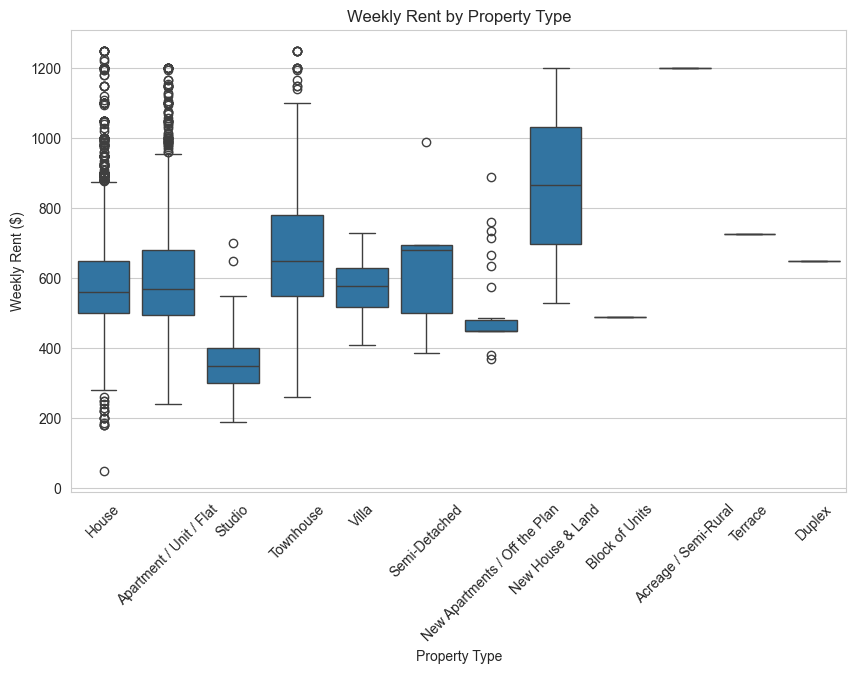

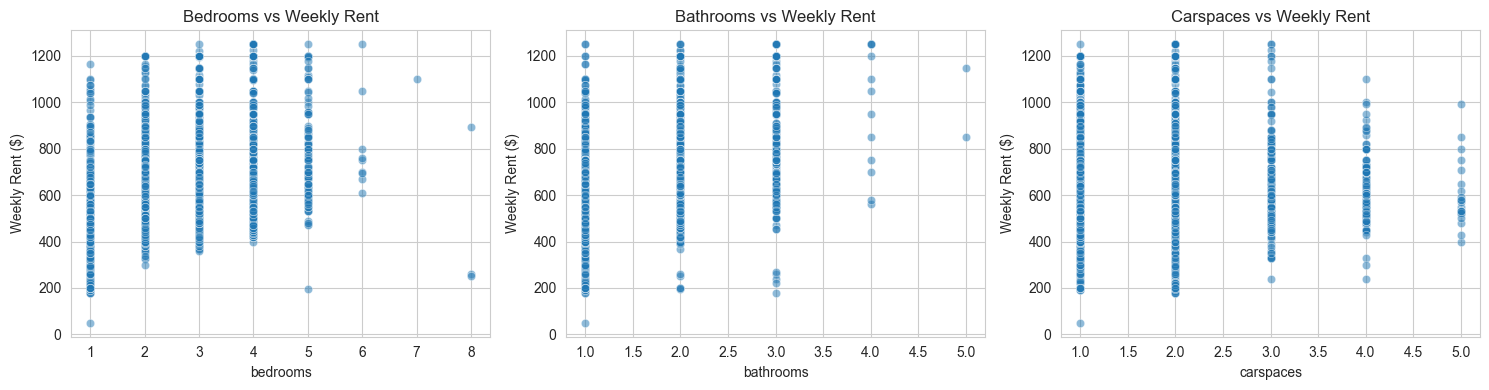

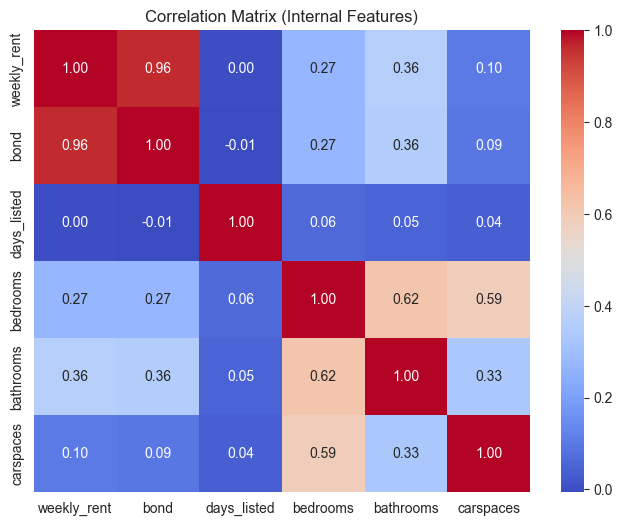

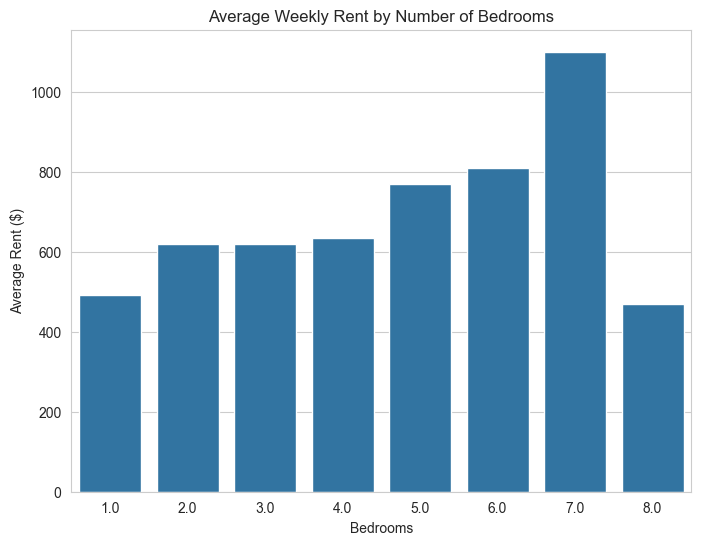

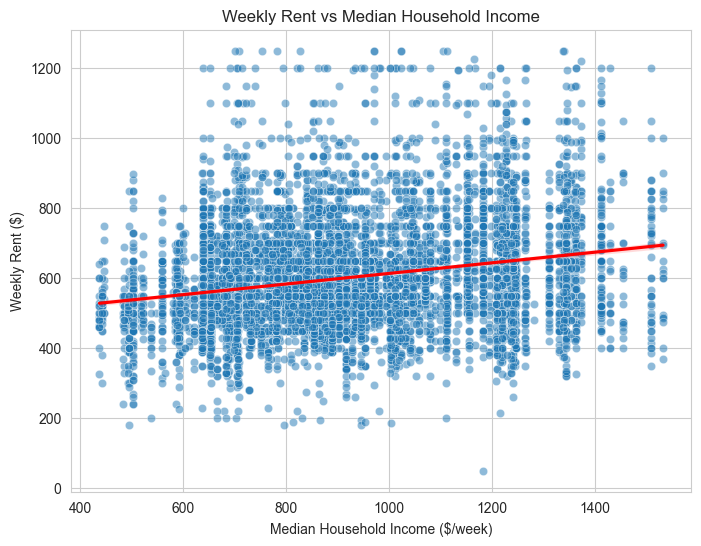

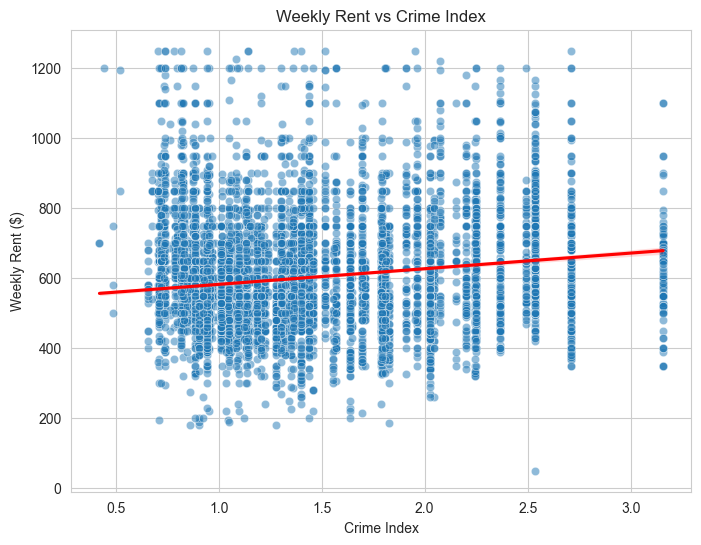

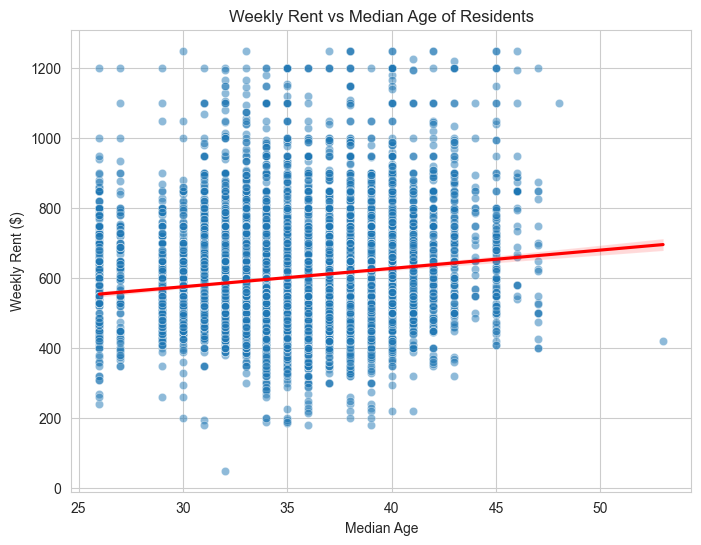

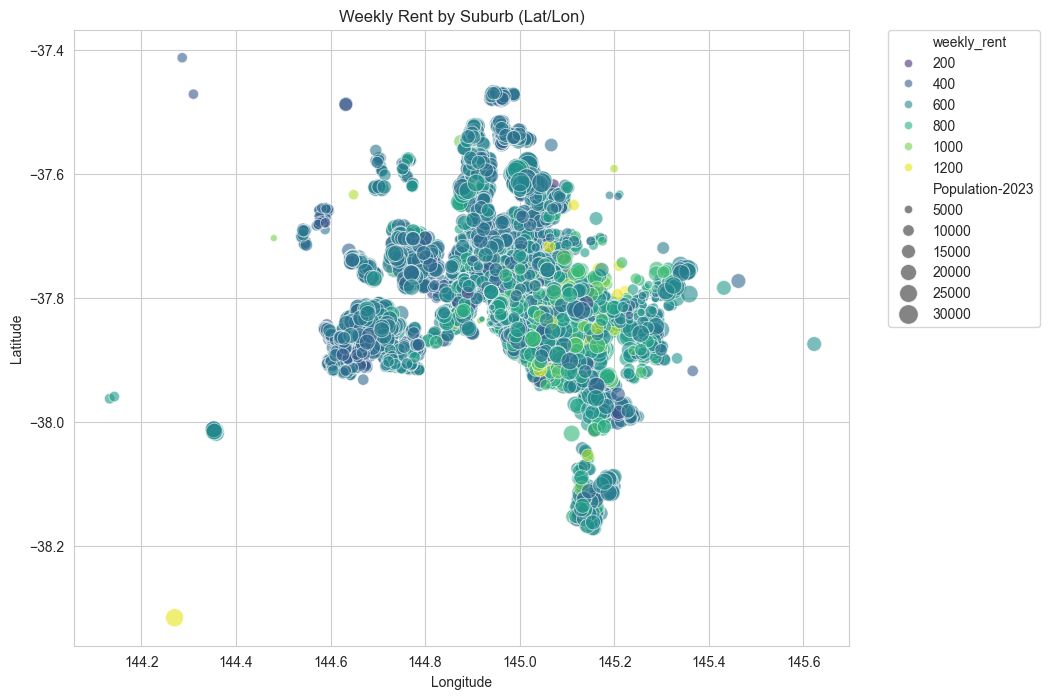

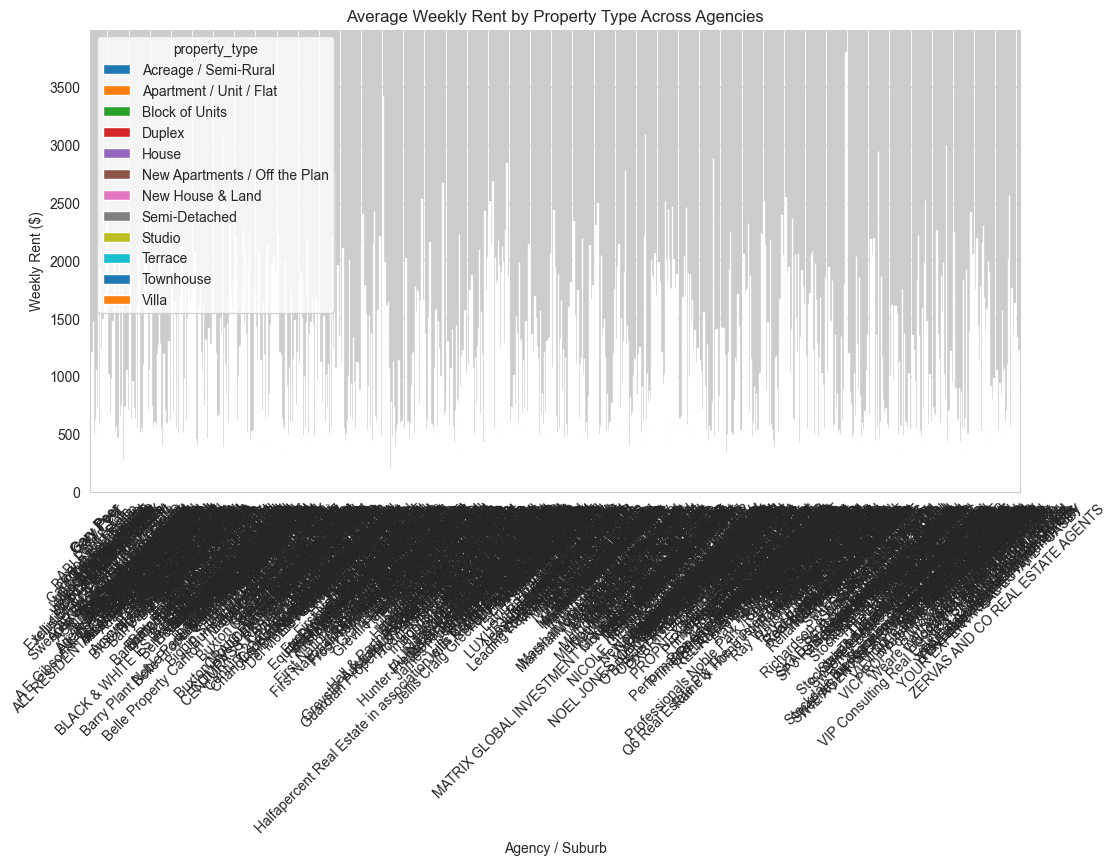

c:\Users\Du-Simon Nguyen\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Du-Simon Nguyen\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


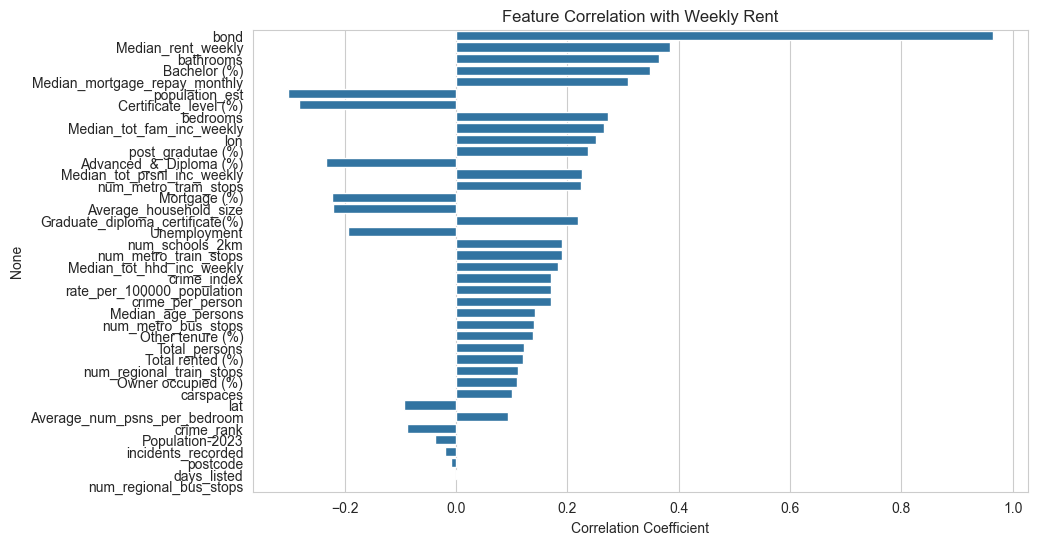

In [ ]:
plot_rent_by_property_type(DATA)
plot_size_features_vs_rent(DATA)
plot_internal_corr(DATA)
plot_avg_rent_by_bedrooms(DATA)
plot_rent_vs_income(DATA)
plot_rent_vs_crime(DATA)
plot_rent_vs_median_age(DATA)
plot_rent_map(DATA)
plot_rent_by_property_suburb(DATA)
plot_feature_correlation(DATA)